In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv('data_cleansed.csv', index_col = 0).drop(['price', 'cleaning_fee'], axis = 1)
data.shape

(42646, 72)

In [27]:
col = data.columns.tolist()
na_count = data.isnull().sum()

In [28]:
col_null = na_count.index[na_count.values>0]

In [29]:
data[col_null] = data[col_null].fillna(0)

In [30]:
from sklearn.model_selection import train_test_split

X = data.ix[:, 1:]
y = data.ix[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## Machine Learning

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()
sum((y_test - lr.fit(X_train, y_train).predict(X_test))**2 )

69735539.545495719

### Regularized Linear Models
- https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models/comments

In [10]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score

In [11]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [12]:
model_ridge = Ridge()

In [13]:
X_train.shape

(8000, 71)

In [14]:
y_train.shape

(8000,)

In [15]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

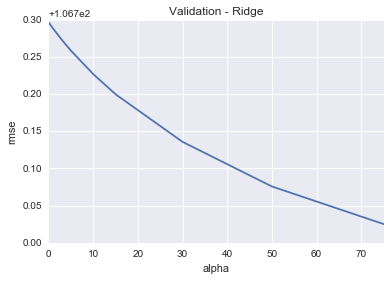

In [16]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [17]:
cv_ridge.min()

106.72518014595248

In [18]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [19]:
rmse_cv(model_lasso).mean()

107.06584346859192

In [20]:
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]

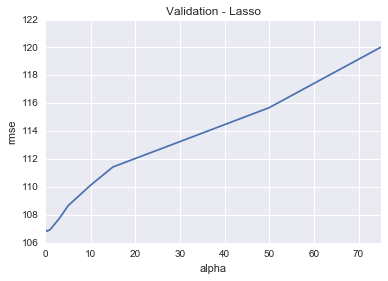

In [21]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Lasso")
plt.xlabel("alpha")
plt.ylabel("rmse")

### RandomForestRegressor
- https://www.kaggle.com/dfitzgerald3/house-prices-advanced-regression-techniques/randomforestregressor/comments

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
cv_score = np.sqrt(-cross_val_score(estimator=clf, X=X_train, y=y_train, cv=15, scoring = scorer))
## Took about 5 minutes

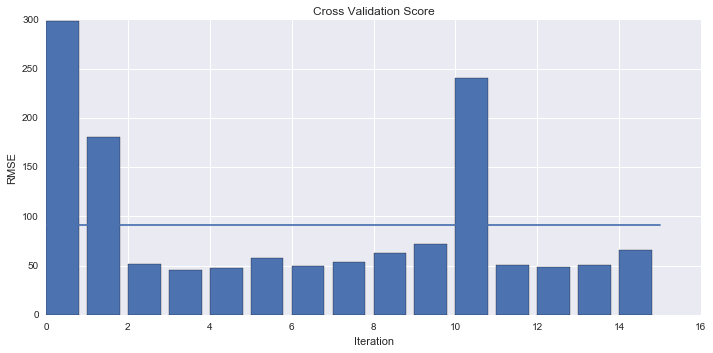

In [24]:
plt.figure(figsize=(10,5))
plt.bar(range(len(cv_score)), cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()

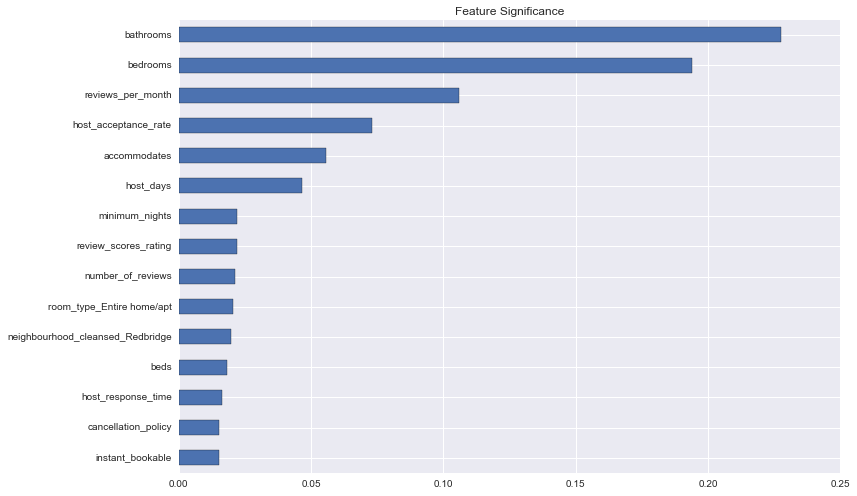

In [25]:
clf.fit(X_train, y_train)

# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)

plt.figure(figsize=(12, 7))
coef[:15].sort_values(ascending = True).plot(kind = 'barh')
plt.title('Feature Significance')
plt.tight_layout()